In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.measure as ski

In [3]:
afmdata=np.genfromtxt('../Data/BackgroundedTXTFiles/500nmGood-1')
afmdata= afmdata*(10**9)

In [17]:
#factor=(255)/(afmdata.max()-afmdata.min())
#for i in range(height):
#    for j in range(width):
#        intensity=np.int((afmdata[i][j]-afmdata.min())*factor)
#        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
#        afmimg[i][j]=np.array([intensity, intensity, intensity])

KeyboardInterrupt: 

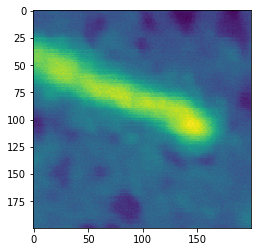

In [4]:
plt.imshow(afmdata[100:300,400:600])

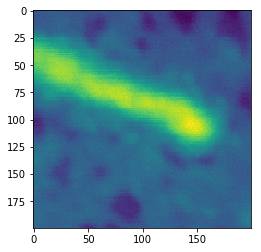

In [28]:
snip11=afmdata[100:300,400:600]
#zeros_idx = np.where(snip11 < 0)
#snip11[zeros_idx] = 0
#print snip11
factor=(255)/(snip11.max()-snip11.min())
height, width = snip11.shape
# afmimg=np.zeros((height, width, 3))
afmimg=np.zeros((height, width))
count = 0
for i in range(height):
    for j in range(width):
        intensity=np.uint8((snip11[i][j]-snip11.min())*factor)
        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
        #afmimg[i][j]=np.array([intensity, intensity, intensity])
        afmimg[i][j]=intensity
#print afmimg
afmimg
plt.imshow(afmimg)

In [29]:
afmimg = np.uint8(afmimg)

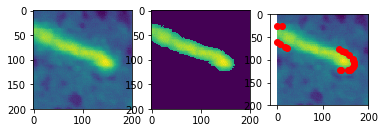

In [32]:
### Cropping out the part that we are interesting in
# snip11=np.uint8(afmdata[300:400,400:500])
# Plotting the image that is interesting to us

#print afmimg
plt.subplot(131),plt.imshow(afmimg)
copy_im=np.copy(afmimg)

# Detecting borders using the Canny algorithm - setting thresholds 
# From the image information - background ~ 69, wire ~100
#edges = cv2.Canny(afmimg,52,100)
#plt.subplot(132),plt.imshow(edges,cmap='gray')


# Different algorithm!
# Locating contours
ret,thresh = cv2.threshold(afmimg,145,255,cv2.THRESH_TOZERO)
plt.subplot(132)
plt.imshow(thresh)
#thresh=cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
derp, contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#print contours
cnts = max(contours, key=cv2.contourArea)
hull = cv2.convexHull(cnts)
#print hull
hull = np.reshape(hull,(len(hull),2))
plt.subplot(133)
plt.imshow(afmimg)
plt.scatter(hull[:,0],hull[:,1],color='r')

#different method
#cnts = max(contours, key=cv2.contourArea)
#rect = cv2.minAreaRect(cnts)
#box = cv2.boxPoints(rect)
#box = np.int0(box)
#hello=cv2.drawContours(copy_im,[box],0,(0,0,255),2)
#hello=cv2.drawContours(snip11, [cnts], 0, (0,255,0), 3)
#plt.subplot(133),plt.imshow(hello)
#plt.scatter(box[:,0],box[:,1], c='yellow')

37
131


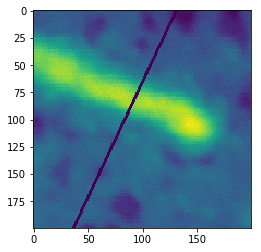

In [38]:
copy_im=np.copy(afmimg)
rows,cols = afmimg.shape[:2]
[line_x, line_y, int_x, int_y] = cv2.fitLine(cnts,distType=2,param=0,reps=0.01,aeps=0.01)
lefty = int((-int_x*line_y/line_x) + int_y)
righty = int(((cols-int_x)*line_y/line_x)+int_y)
#cv2.line(copy_im,(cols-1,righty),(0,lefty),(0,255,0),2)
cv2.line(copy_im,(righty,0),(lefty,cols-1),(0,255,0),2)
plt.imshow(copy_im)
print lefty
print righty
#plt.plot(line_x + int_x, line_y + int_y,color='r')

In [41]:
profile = ski.profile_line(afmimg,(righty,0),(lefty,cols-1))

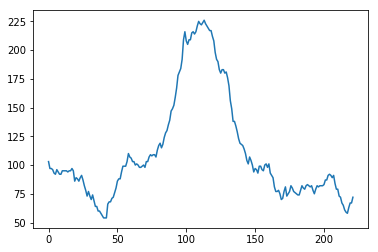

In [42]:
plt.plot(profile)

In [43]:
profile

array([ 103.,   97.,   97.,   96.,   93.,   92.,   96.,   94.,   92.,
         92.,   95.,   95.,   95.,   95.,   94.,   95.,   95.,   97.,
         95.,   86.,   89.,   88.,   86.,   89.,   91.,   87.,   82.,
         78.,   73.,   77.,   73.,   70.,   74.,   69.,   64.,   64.,
         60.,   60.,   58.,   56.,   54.,   54.,   54.,   66.,   68.,
         68.,   71.,   72.,   76.,   80.,   86.,   88.,   88.,   94.,
         99.,   99.,   99.,  103.,  110.,  107.,  106.,  103.,  103.,
        100.,  101.,  100.,   98.,   98.,   99.,  100.,   98.,  103.,
        103.,  107.,  109.,  108.,  109.,  109.,  107.,  113.,  117.,
        119.,  115.,  118.,  124.,  128.,  130.,  135.,  139.,  147.,
        149.,  152.,  159.,  167.,  178.,  181.,  184.,  192.,  209.,
        216.,  208.,  205.,  209.,  209.,  215.,  216.,  214.,  216.,
        221.,  225.,  223.,  222.,  224.,  226.,  223.,  221.,  219.,
        217.,  217.,  212.,  208.,  198.,  192.,  190.,  183.,  180.,
        183.,  183.,

In [44]:
adjusted_profile = profile/255 * 1e-9

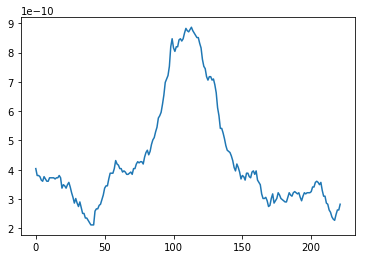

In [45]:
plt.plot(adjusted_profile)

In [ ]:
# here are some functions!
def afm_copier(afmimg):
    '''this makes a copy of the snipped and backgrounded afm image'''
    image_copy = np.copy(afmimg)
    return image_copy

In [ ]:
def contour_finder(copied_image):
    '''Here we use a threshold to find the contours
    of the selected image.'''
    # now determine the threshold - we choose half the max intensity
    ret,thresh = cv2.threshold(copied_image,130,255,cv2.THRESH_TOZERO)
    # this determines the contours
    dummy, contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours


In [ ]:
def convex_hull_determiner(afmimg,contours):
    '''This uses the calculated contours to determine
    the existence of a convex hull (i.e. a nanowire)'''
    # This turns the contours into an array of points
    cnts = max(contours, key=cv2.contourArea)
    # now we determine whether or not there is a hull
    hull = cv2.convexHull(cnts)
    hull = np.reshape(hull,(len(hull),2))
    return cnts, hull

In [ ]:
def draw_line(cnts,afmimg,copied_image):
    '''Here we use the convex hull to fit a line along
    the nanowire, and then switch the indeces so that
    the line lies along the short axis of the wire'''
    rows,cols = afmimg.shape[:2]
    # Here we fit a line along the nanowire
    [line_x, line_y, int_x, int_y] = cv2.fitLine(cnts,distType=2,param=0,reps=0.01,aeps=0.01)
    #this determines the left and right side endpoints of the line...
    lefty = int((-int_x*line_y/line_x) + int_y)
    righty = int(((cols-int_x)*line_y/line_x)+int_y)
    # ...but we inverse the indeces, thus generating a perpendular line
    wire_with_line = cv2.line(copied_image,(righty,0),(lefty,cols-1),(0,255,0),2)
    return wire_with_line,righty,lefty,cols

In [ ]:
def wire_profile(afmimg,righty,lefty,cols):
    '''Now we compute the profile and adjust to real units'''
    profile = skimage.measure.profile_line(afmimg,(righty,0),(lefty,cols-1))
    return profile

[[[ 2  0]]

 [[ 3  1]]

 [[ 0  4]]

 [[ 2  6]]

 [[ 1  7]]

 [[ 3  9]]

 [[ 3 10]]

 [[ 4 11]]

 [[ 3 12]]

 [[ 4 11]]

 [[ 5 12]]

 [[ 5 13]]

 [[ 6 14]]

 [[ 6 13]]

 [[ 7 12]]

 [[ 8 12]]

 [[ 9 13]]

 [[ 8 14]]

 [[ 9 15]]

 [[ 7 17]]

 [[ 6 16]]

 [[ 5 16]]

 [[ 3 14]]

 [[ 4 15]]

 [[ 3 16]]

 [[ 2 16]]

 [[ 1 15]]

 [[ 0 16]]

 [[ 0 17]]

 [[ 1 18]]

 [[ 0 19]]

 [[ 1 20]]

 [[ 0 21]]

 [[ 1 20]]

 [[ 5 20]]

 [[ 6 21]]

 [[ 6 24]]

 [[ 7 25]]

 [[ 6 26]]

 [[ 7 27]]

 [[ 7 29]]

 [[ 6 30]]

 [[ 6 32]]

 [[ 7 31]]

 [[ 8 32]]

 [[ 8 34]]

 [[ 6 36]]

 [[ 3 36]]

 [[ 3 38]]

 [[ 2 39]]

 [[ 0 39]]

 [[ 2 39]]

 [[ 3 38]]

 [[ 4 39]]

 [[ 5 38]]

 [[ 7 38]]

 [[ 6 37]]

 [[ 7 36]]

 [[ 8 36]]

 [[10 38]]

 [[10 39]]

 [[10 38]]

 [[12 36]]

 [[13 36]]

 [[14 35]]

 [[15 35]]

 [[14 35]]

 [[13 34]]

 [[13 33]]

 [[14 32]]

 [[15 33]]

 [[15 32]]

 [[14 32]]

 [[12 34]]

 [[11 34]]

 [[10 33]]

 [[ 9 34]]

 [[ 8 33]]

 [[ 8 30]]

 [[ 7 29]]

 [[ 9 27]]

 [[10 28]]

 [[11 28]]

 [[1

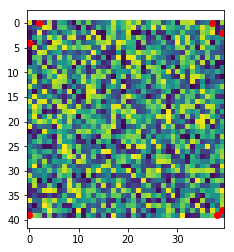

In [34]:
copied_image = np.random.rand(40,40)*255
copied_image = np.uint8(np.floor(copied_image))
ret,thresh = cv2.threshold(copied_image,130,255,cv2.THRESH_TOZERO)
dummy, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = max(contours, key=cv2.contourArea)
hull = cv2.convexHull(cnts)
#print hull
hull = np.reshape(hull,(len(hull),2))
#plt.subplot(133)
plt.imshow(copied_image)
plt.scatter(hull[:,0],hull[:,1],color='r')
hull
#cnts = max(contours, key=cv2.contourArea)
im_with_contours=cv2.drawContours(copied_image,cnts,0,(0,0,255),2)
np.isclose((hello-copied_image).all(), 0)
#if np.isclose(hello - copied_image, 0).all():
#    assert "no contours"
print cnts

In [ ]:
plt.